# Loan Application Status Prediction
# Project Description
# This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
# Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# LET'S IMPORT OUR DATASET

In [2]:
loan=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


AS WE CAN SEE THAT  HERE OUR TARGET VARIABLE IS LOAN_STATUS AND IF WE LOOK THE DATA WE CAN SEE THAT OUR TRAGET VARIABLE IS CLASSIFICATION TYPE PROBLEM

In [3]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
loan.shape

(614, 13)

AS YOU CAN SEE THAT WE HAVE 13 COLUMNS AND 614 ROWS 

In [5]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

AS YOU CAN SEE THAT WE HVAE FEW NULL VALUES PRESENT IN SOME FEATURE IF THE DATASET SO WE HAAVE TO REMOVE THAT 

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# FIRST LET'S DROP THE LOAN_ID BECAUSE IT NDOESEN;T CONTRIBUTE TO OUR TARGTE VARIABLE 
loan.drop(columns="Loan_ID",axis=1,inplace=True)

In [8]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


AS YOU CAN SEE WE HAVE DROP THE LOAN_ID COLUMN FROM THE DATASET NOW OUR DATSET IS MORE CLEAN LET'S FILL MISSING VALUES OF THE DATSET 

In [9]:
row_with_null=loan[loan.isnull().any(axis=1)]

In [10]:
row_with_null

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...
592,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


ABOVE ARE ALL THE ROW CONTAIN ATLEAST ONE NULL VALUES IN THE DATASET

In [11]:
# LET'S FILL THE MISSING VALUESS OF THE DATASET WITH MEAN TO REMOVE THE NULL VALUES FROM THE DATASET
column_with_null=["LoanAmount","Loan_Amount_Term","Credit_History"]
loan=loan.fillna(loan[column_with_null].mean())

In [12]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [13]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
column_categorical = ["Gender", "Married", "Dependents","Self_Employed"]
loan = loan.fillna(loan[column_categorical].mode().iloc[0])

In [15]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [16]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

AS YOU CAN SEE THAT WE HAVE REMOVED ALLTHE NULL VALUES PRESENT IN THE FEW OF THE FEATURE IN THE DATASET NOW WE SEE OUR DATASET IS CLEAN

In [17]:
loan.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [18]:
loan["Credit_History"].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

In [19]:
loan["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

THERE ARE ALSO ALMOST 422 YES APPLICANTS AND 192 NO APPLICANTS IN THE DATASET OF THE LOAN APPLICANTS

In [20]:
marr_staus=pd.crosstab(loan["Married"],loan["Loan_Status"])

In [21]:
marr_staus

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


In [22]:
marital_status_totals = marr_staus.sum(axis=1)
marr_staus_percent = marr_staus.div(marital_status_totals, axis=0) * 100


In [23]:
marr_staus_percent

Loan_Status,N,Y
Married,,
No,37.089202,62.910798
Yes,28.179551,71.820449


AS WE CAN CLEALRY SEE THAT PEOPLE WHO ARE NOT MARRIED GETTING LOAN MORE ALMOST 62.9% RATHER THAN WHO NET GETTING LOAN ARE 37.08%

WE CAN ALSO SEE THAT WHO PEOPLE WHO ARE MARRIED GETTING LOAN ARE MORE THAN UNMARRIED ALMOST 71.82 % WHERE AS UNMARRIED PEOPLE GETTING LOAN AMOST 62.9% WHCH IS VERY LESS 

In [24]:
loan.duplicated().sum()

0

AS WE CAN SEE THAT THERE ARE NO DUPLICATED VALUES PRESENT IN THE DATASET 


In [25]:
edu_stat=pd.crosstab(loan["Education"],loan["Loan_Status"])

In [26]:
edu_stat

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [27]:
edu_status_totals =edu_stat.sum(axis=1)
edu_staus_percent = edu_stat.div(edu_status_totals, axis=0) * 100
edu_staus_percent

Loan_Status,N,Y
Education,,
Graduate,29.166667,70.833333
Not Graduate,38.805970,61.194030


AS WE CAN CLEALRY SEE THAT ALMOST 70.83 % GRADUATED PEOPLE ARE GETTING MORE LOAN THAN NON GRADUATED PEOPLE OBVIUOSLY IF YOU ARE GRADUATED THEN IT MEANS YOU ARE DOING GOOD JOB AND HAVE CAPABILITY TO REPAY THE LOAN AMOUNT SO THERE IS JIGHER CHANCE OF TO GET LOAN FOR GRADUATED PEOPLE

ALSO WE CAN SEE THAT NON GRADUATE PEOPLE HAVE HIGHER CHACE OF NETTING LOAN 38% WHERS AS GRADUATED PEOPLE HAVE CHANCE OF 29% 

In [28]:
cred_area_stat=pd.crosstab(loan["Property_Area"],[loan["Credit_History"],loan["Loan_Status"]])
cred_area_stat

Credit_History 0.000000    0.842199     1.000000     
Loan_Status           N  Y        N   Y        N    Y
Property_Area                                        
Rural                26  2        4  10       39   98
Semiurban            26  4        5  11       23  164
Urban                30  1        4  16       35  116

AS WE CAN SEE THE INSIGHT AND GAIN LITTLE INFORMATION ABOUT THE DATASET LET'S SEE
1. WE CAN SEE PEOPLE WHO HAVE CREDIT SCORE 1.00 WTHER THEY BELONG TO RURAL , SEMEURBAN. URBAN DOSENT' MATTER THERE CHANCE OF GETTING LOAN IS HIGHER WE CAN SEE :
IN RURAL WE CAN SEE THAT 98 PEOPLE GET THE LOAN 39 NOT 
IN SEMIURBAN WE CAN SEE THAT 164 PEEOPLE GET THE LOAN AND 23 NOT
IN URBAN WE CAN SEE THAT 116 PEOPLE CAN GTE THE LOAN AND 35 NOT

2.  WE CAN SEE PEOPLE WHO HAVE CREDIT SCORE 0.842199 WTHER THEY BELONG TO RURAL , SEMEURBAN. URBAN DOSENT' MATTER THERE CHANCE OF GETTING LOAN IS MEDIUM  WE CAN SEE :
IN RURAL 39 PEOPLE GOT THE LOAN AND 10 POEPLE NOT GET THE LOAN 
IN SEMIURBAN 23 POEPLE GOT THE LOAN AND 11 PEOPLE NOT GTE THE LOAN
IN URBAN 35 POPLE GET THE LOAN AND 16 NOT 

3. WE CAN SEE PEOPLE WHO HAVE CREDIT SCORE 0.000 WTHER THEY BELONG TO RURAL , SEMEURBAN. URBAN DOSENT' MATTER THERE CHANCE OF GETTING LOAN IS VERY LOW  WE CAN SEE :
IN RURAL ONLY 2 POEPLE GET THE LOAN
IN SEMIURAN 4 POPEL GTE LOAN AND 26 NOT 
IN URBAN ONLY 1 POEPLE GET THE LOAN 30 PEOPLE NOT 

In [29]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


1. AS WE CAN SEE THAT CONT IS EQUAL FOR ALL THE FEATUER WHICH ARE EQUAL IT MEANS NO MISSING VALUES PRESENT 

2. FOR FEW FEATURE MEAN IS GRETEAR THAN 2ND QUARTILE IT MEANS THERE IS CHANCE OF LEFT , RIGHT SKWENESS PRESENT IN THE DATSET 

3. AS YOU CAN SEE THAT 75% IS GREATEAR THAN MAX IT MAN THERE IS CHANCE OF OUTLIERS PRESWEN IN THE DATASET WE HAVR TO CHECK AND REMOVE THAT 

# LET'S USE LABEL ENCODER 

In [30]:
# LET'S USE LABEL ENCODER TO ENCODE THE CATEGORICAL COLUMN TO NUMERICAL COLUMN 
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [31]:
column_to_encode=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]
for column in column_to_encode:
    loan[column]=LE.fit_transform(loan[column])

In [32]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


AS WE CAN SEE WE HAVE CONVERTED OUR CATEGORICAL COLUMN INTO NUMERICAL COLUMN SO NOW OUR DATA ID=S PERFECTLY FINE TO DO FURTHER ANALYSIS

# DATA VISUALIZATION

# UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Married', ylabel='count'>

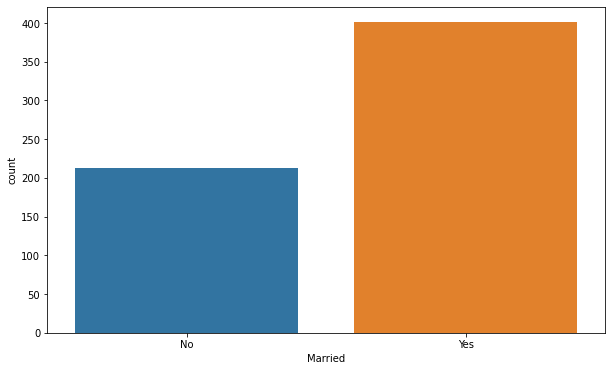

In [30]:
# LET'S DRAW SOME GRAPH AND SEE THE INSIGHT OF THE DATA
plt.figure(figsize=(10,6))
sns.countplot(x="Married",data=loan)

AS WE CAN SEE THAT THERE ARE MORE NUMBER OF MARRIED PEOPLE ALMOST MORE THAN 400 WHOX APPLY FOR THE LOAN APPLICATION AND MOE THAN 200 PEOPLE WHO ARE MOT MARRIED APPLY FOR THE LOAN APPLICATION

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

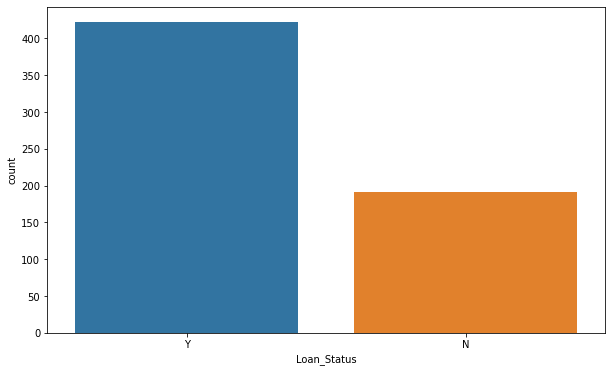

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x="Loan_Status",data=loan)

AS WE CAN SEE THAT PEOPLE WHO GOT THE LOAN ARE MORE THAN 400 AND PEOPLE WHO NIT GET THE LOAN ARE LESS THAN 200

<AxesSubplot:xlabel='Gender', ylabel='count'>

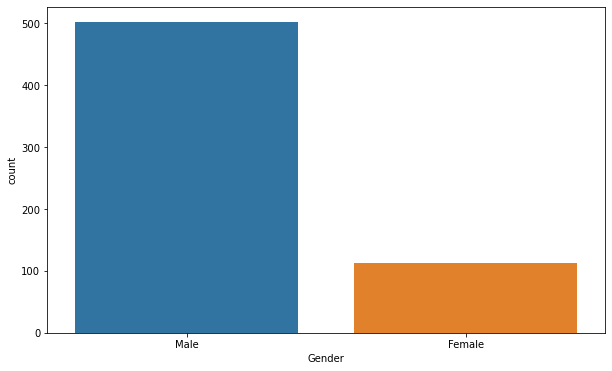

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x="Gender",data=loan)

AS YOU CAN SEE THAT THERE ARE MORE NUMBER OF MALES ALMOST 500 MALES ARE PRESENT AND MORE THAN 150 FEMALES ARE PRESENT WHO APPPLY FOR THE LOAN APPLICATION STATUS 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

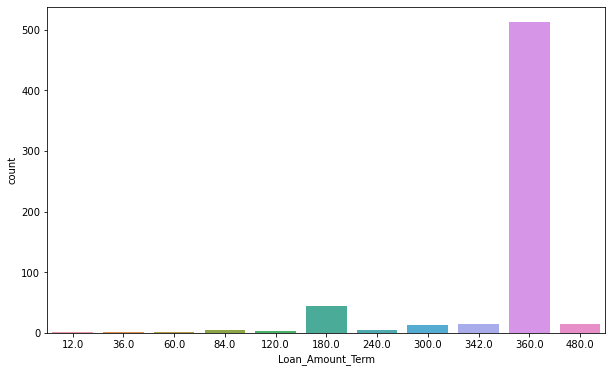

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x="Loan_Amount_Term",data=loan)

THE MAXIMUM DURATION FOR THE LOAN_AMOUNT_TERM WAS 360 IT MEANS AMXIMUM PEOPLE WHO OPTED FOR THE 360 DURATION LOAN WAS HIGHER THAN ANY OTHER LOAN_TERM_DURATION

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

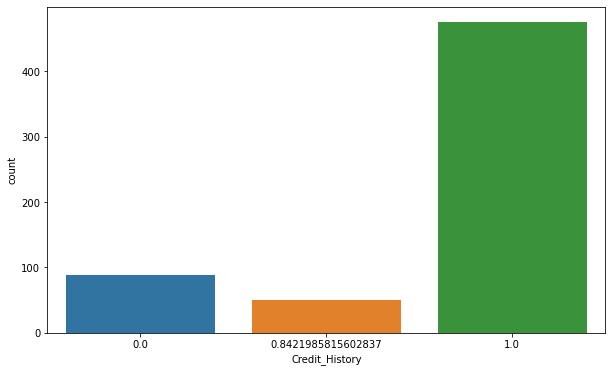

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x="Credit_History",data=loan)

AS WE CAN SEE THAT MAXIMUM NUMBER OF CREDIT_HISTORY AVAILABLE ARE 1.0 AND MINIMUM PEOPLE WHO HAVE CREDIT SCORE ARE 0.8421 AND PEOPLE WHO DON'T GET THE 0.0 CREDIT SCORE 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

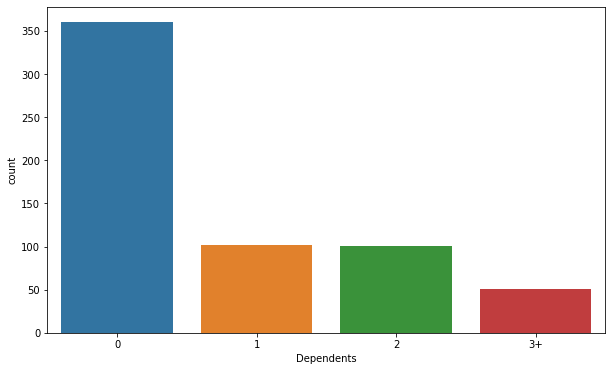

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x="Dependents",data=loan)

AS YOU CAN SEE THAT THERE ARE MORE NUMBER OF PEOPLE WHO HAVING 0 DEPENDENTS PEOPLE AND 1 AND 2 ARE ARE HAVING PEOPLE DEPENDENTS SAME AMD FEW POPLE HAVING DEPENDTS MORE THAN 3+

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

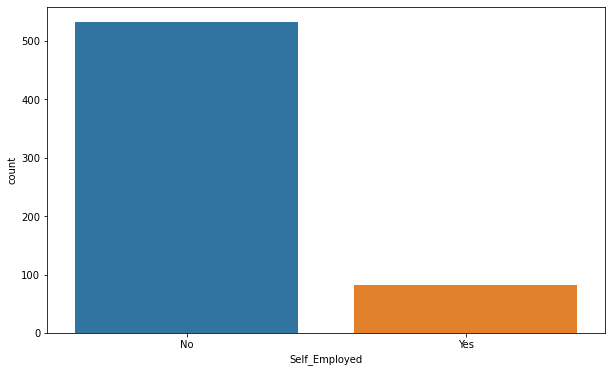

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x="Self_Employed",data=loan)

AS WE CAN SEE THAT THERE ARE MORE NUMBER OF PEOPLE WHO ARE NOT SELF EMPLOYED AND LESS PEOPLE WHO ARE SELF EMPLOYED 

<AxesSubplot:xlabel='Education', ylabel='count'>

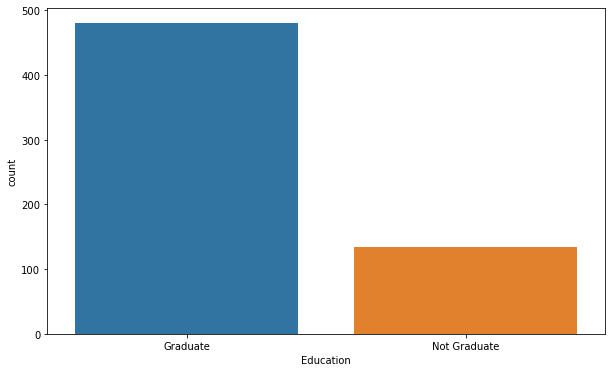

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x="Education",data=loan)

AS WE CAN SEE THAT THERE ARE ALMOST CLOSE TO 500 PEOPLE ARE GRADUATED AND ALMOSTV 150 PEOPLE ARE NON- GRADUATED WE CAN SEE THERE ARE MORE NUMBER OF GRADUATED PEOPLE THAN NON GRADUATED AND WE ASLO SEE THAT ABOVE GRAPH THAT VHANCE FOR GRADYATED PEPLE TO GET LOAN ARE ALSO HIGH THEN NON GRADUATED PEOPLE BECAUSE OBVIOSULY IF THEY ARE GRADUATED IT MEANS SO KIND OF JOB THEY ARE DOING AND DUE TO WHICH THE ARE ABLE TO PAY THE LOAN

# BIVARIATE ANALYSIS 

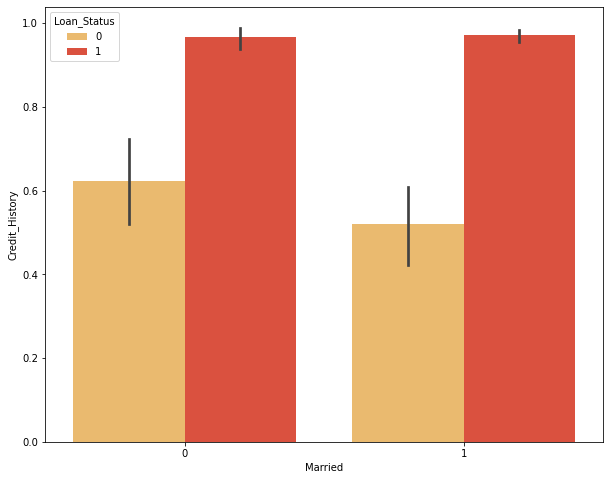

In [49]:
# LET'S PLOT GRAPH TO SEE THE RELATION BETWEEN THE FEATURE
plt.figure(figsize=(10,8))
sns.barplot(x="Married",y="Credit_History",hue="Loan_Status",data=loan,palette="YlOrRd")
plt.show()

1. AS WE CAN SEE THAT PEOPLE WHO ARE NOT MARRIED AND HAVE A CREDIT SCORE OF 1 HAVE VERY HIGHER CHANCE OF GETTING LOAN AS WE CAN CLEALRY SEE FROM THE GRAPH 

2. AS WE CAM ALSO SEE THAT THOSE WHO ARE MARRIED AND HAVE CREDIT SCORE 1 HAVE HIGHER CHANCE OF GETTING LOAN APPLICATION 

BUT AS YOU CAN SEE IN BOTH THE CASE IF THEY ARE MARRIED OR UNMARRIED IOF THERE CREDIT SCORE IS BAD LESS THAN 0.8 THERE CHANCE OF GETTING LOAN BECOME VERY LESS AS COMPARED TO OTHER 

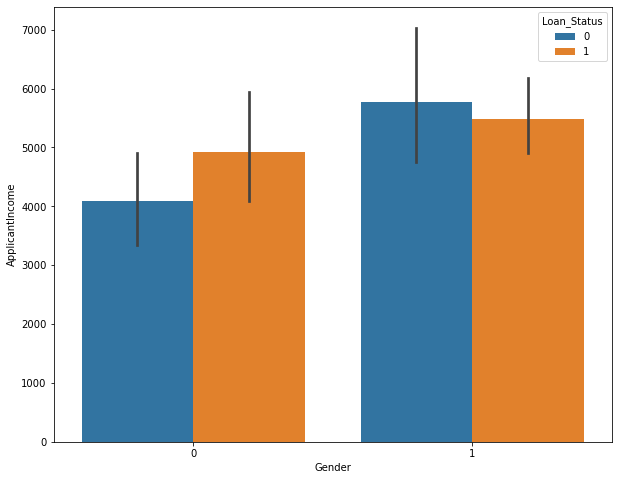

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(x="Gender",y="ApplicantIncome",hue="Loan_Status",data=loan)
plt.show()

HERE MALE IS = 1 AMD FEMALE REPRESENT BY 0
1. AS WE CAN CLEALRY SEE THAT FROM GRPAH BAR THAT MALE HAVE MORE INCOME THAN FEMALE BUT STILL MORE NUMBER OF MALES ARE NOT GETTING LOAN 
AND INTERSETINGLY IN MALE COLUMN WE CAN SEE THAT EVEN THE INCOME OF MALE IS HIGHER THE CHANCE OF GETTING LOAN IS VERY LESS AS COMPARED TO MALE WHO HAVE LITTILE LOWER INCOME THAN HIGHER INCOME MEN 

2. SIMILATLY WE CAN SEE THAT EVEN WOMEN HAVE LESS INCOME THAN MEN BUT STILL WE CAN SEE MORE NUMBER OF WOMEN ARE GETTING THE LOAN COMPARED TO LESS INCOME WOMEN IN THE WOMEN CATEGORY 

BUT OBVIOSULY NUMBER OG MALES ARE GETTING MORE LOAN THAN WOMEN AS APLLICANT FOR LOAN FROM MEN SIDE AARE HIGHER ALSO

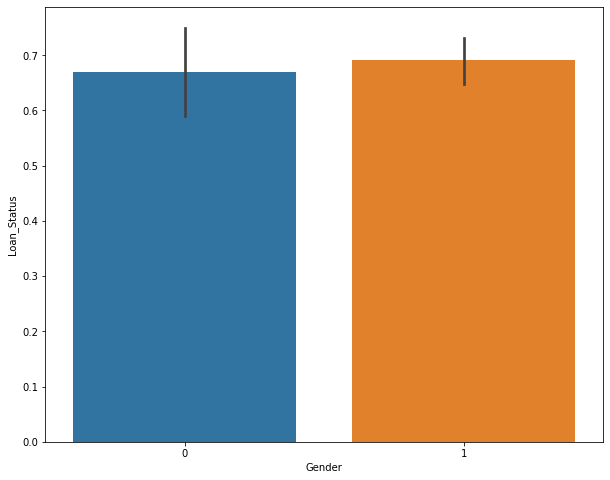

In [53]:
plt.figure(figsize=(10,8))
sns.barplot(x="Gender",y="Loan_Status",data=loan)
plt.show()

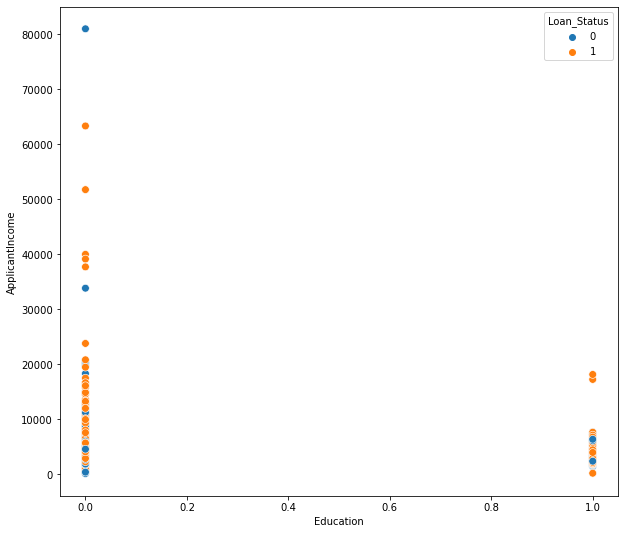

In [61]:
plt.figure(figsize=(10,9))
sns.scatterplot(x="Education",y="ApplicantIncome",hue="Loan_Status",data=loan,s=60)
plt.show()

AS WE CAN SEE THERE ARE TWO CATEGORY EDUCATED AND NON EDUCATED PEOPLE IN THAT LET'S SEE 
 AS WE CAN SEE THAT IF PEOPLE HAVE HIGHER INCOME HENERALLY THEY ARE HETTING LOAN EASLY  EVEN IF THEY ARE NOT EDUCATED AS DUE TO IF THEY EARN MORE MEANS THEY CAN PAY THE LOAN SO FOR TEM IT IS EASY 
 
BUT WE CAN ALSO CHECK THAT THERE ARE MORE NUMBER OF PEOPLE WHO ARE NOT EDUCATED AND PEOPLE WHO ARE EDUCATED BUT THERE INCOME IS LESS COMPARED TO WHO ARE EDUCATED 

<Figure size 720x576 with 0 Axes>

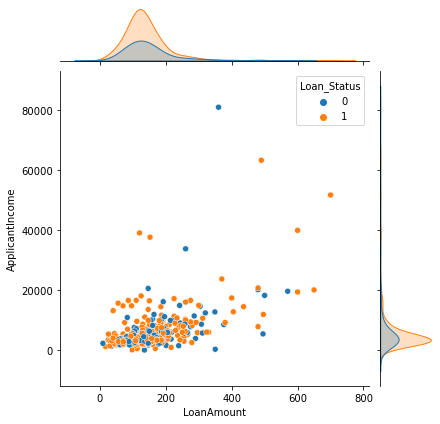

In [62]:
plt.figure(figsize=(10,8))
sns.jointplot(x="LoanAmount",y="ApplicantIncome",hue="Loan_Status",data=loan)
plt.show()

AS WE CAN SEE THAT PEOPLE WHO HAVE LOAN AMOUNT BETWEEN 0 TO 250 HAVE HIGHER CHANCE OF GETTING LOAN AND THERE INCOME IS ALSO BETWEN 0 TO 2000 SO GENREALLY LOW LOAN AMOUNT ARE HIGHER AND HAVE ALMOST CHANCE OF GETTING LOAN 

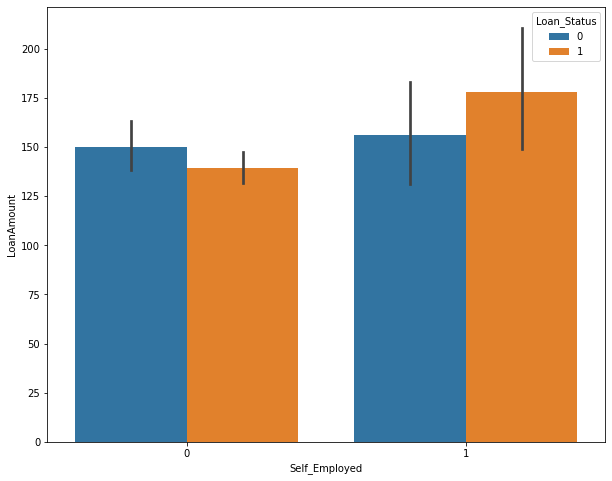

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(y="LoanAmount",x="Self_Employed",hue="Loan_Status",data=loan)
plt.show()

In [ ]:
AS YOU CAN SEE THAT PEOPLE

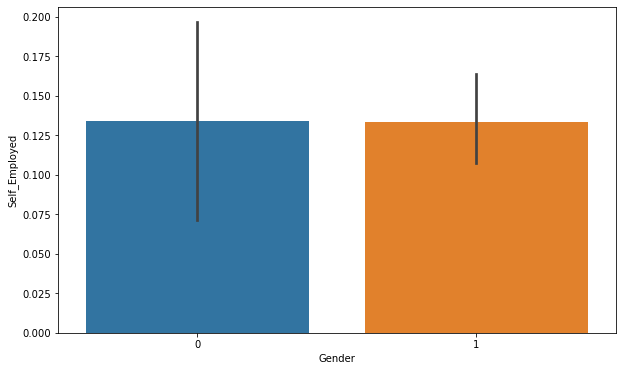

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(x="Gender",y="Self_Employed",data=loan)
plt.show()

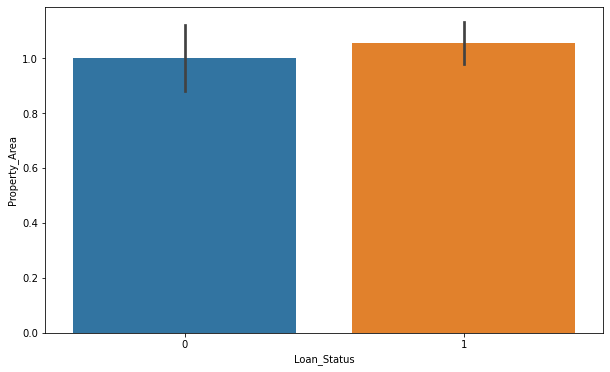

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(x="Loan_Status",y="Property_Area",data=loan)
plt.show()

AS WE CAN SEE POEPLE WHO HAVE PROPERTY AREA MORE THAN 1 THEY ARE MORE LIKELY TO GET THE LOAN AS WE CAN CLEALRY SEE IN THE GRAPH  AND THOSE WHO HAVE PROPERTY AREA LESS THAN 1 OER EQUAL TO 1 HAVE LESS CHANCE TO GET LOAN

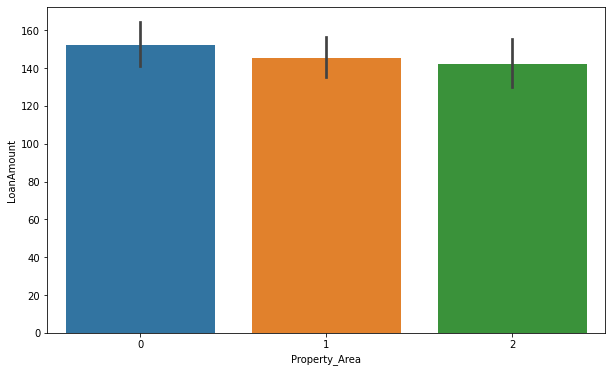

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(y="LoanAmount",x="Property_Area",data=loan)
plt.show()

AS WE CAN SEE THAT PEOPLE HAVING 0 PROPERT  AREA HAVE HIGHER LOAN AMOUNT MORE THAN 160 AND PEOPLE HAVE HIGHER PROPERTY AREA HVAE LOWER LOAN MAOUNT AND WE ALREADY SEE THAT POEPLE WHO HAVE PROPETY AREA MORE THAN 1 THAT PEOPLE HAVE HIGHER CHANCE OF GETTING LOAN BEACUSE COMPANY BEAUSE  BANK GENERALLY GIVE LOAN EASILY TO PEOP;E HAVE SOME COLLATERAL WITH THEM SO IF THEY UNAVAILABLE TO PAY THEY CAN HAVE THERE PROPERTY 

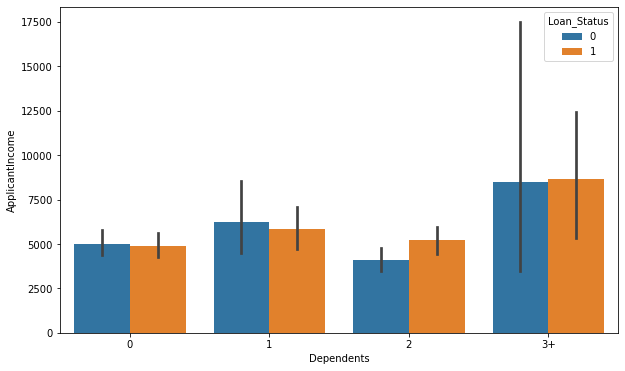

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(y="ApplicantIncome",x="Dependents",hue="Loan_Status",data=loan)
plt.show()

AS YOU CAN SEE PEOPLE HAVE 0 DEPENDENTS BOTH OF THEM HAVE ALSO LESS INCOME AN DBIT OF THEM LESS LIKELEY TO BUT AS YOU SEE IF THE DEPENDENTS INCREASES THE LOAN APPLICANT INCOME ALSO START INCRESES AND THE THE CHANCE OF LOAN GETTING ALSO INCRESES AS BECAUSE IN CASE YOU NOT ABLE TO PAY THE LOAN THEN THE THEY WILL TAKE FROM DEPNDETS HIGHER DEPENDETS MEANS APPLICANT WILL ABLE TO PAY LOAN BACK 

# MULTIVARIATE ANALYSIS 

<Figure size 1800x1440 with 0 Axes>

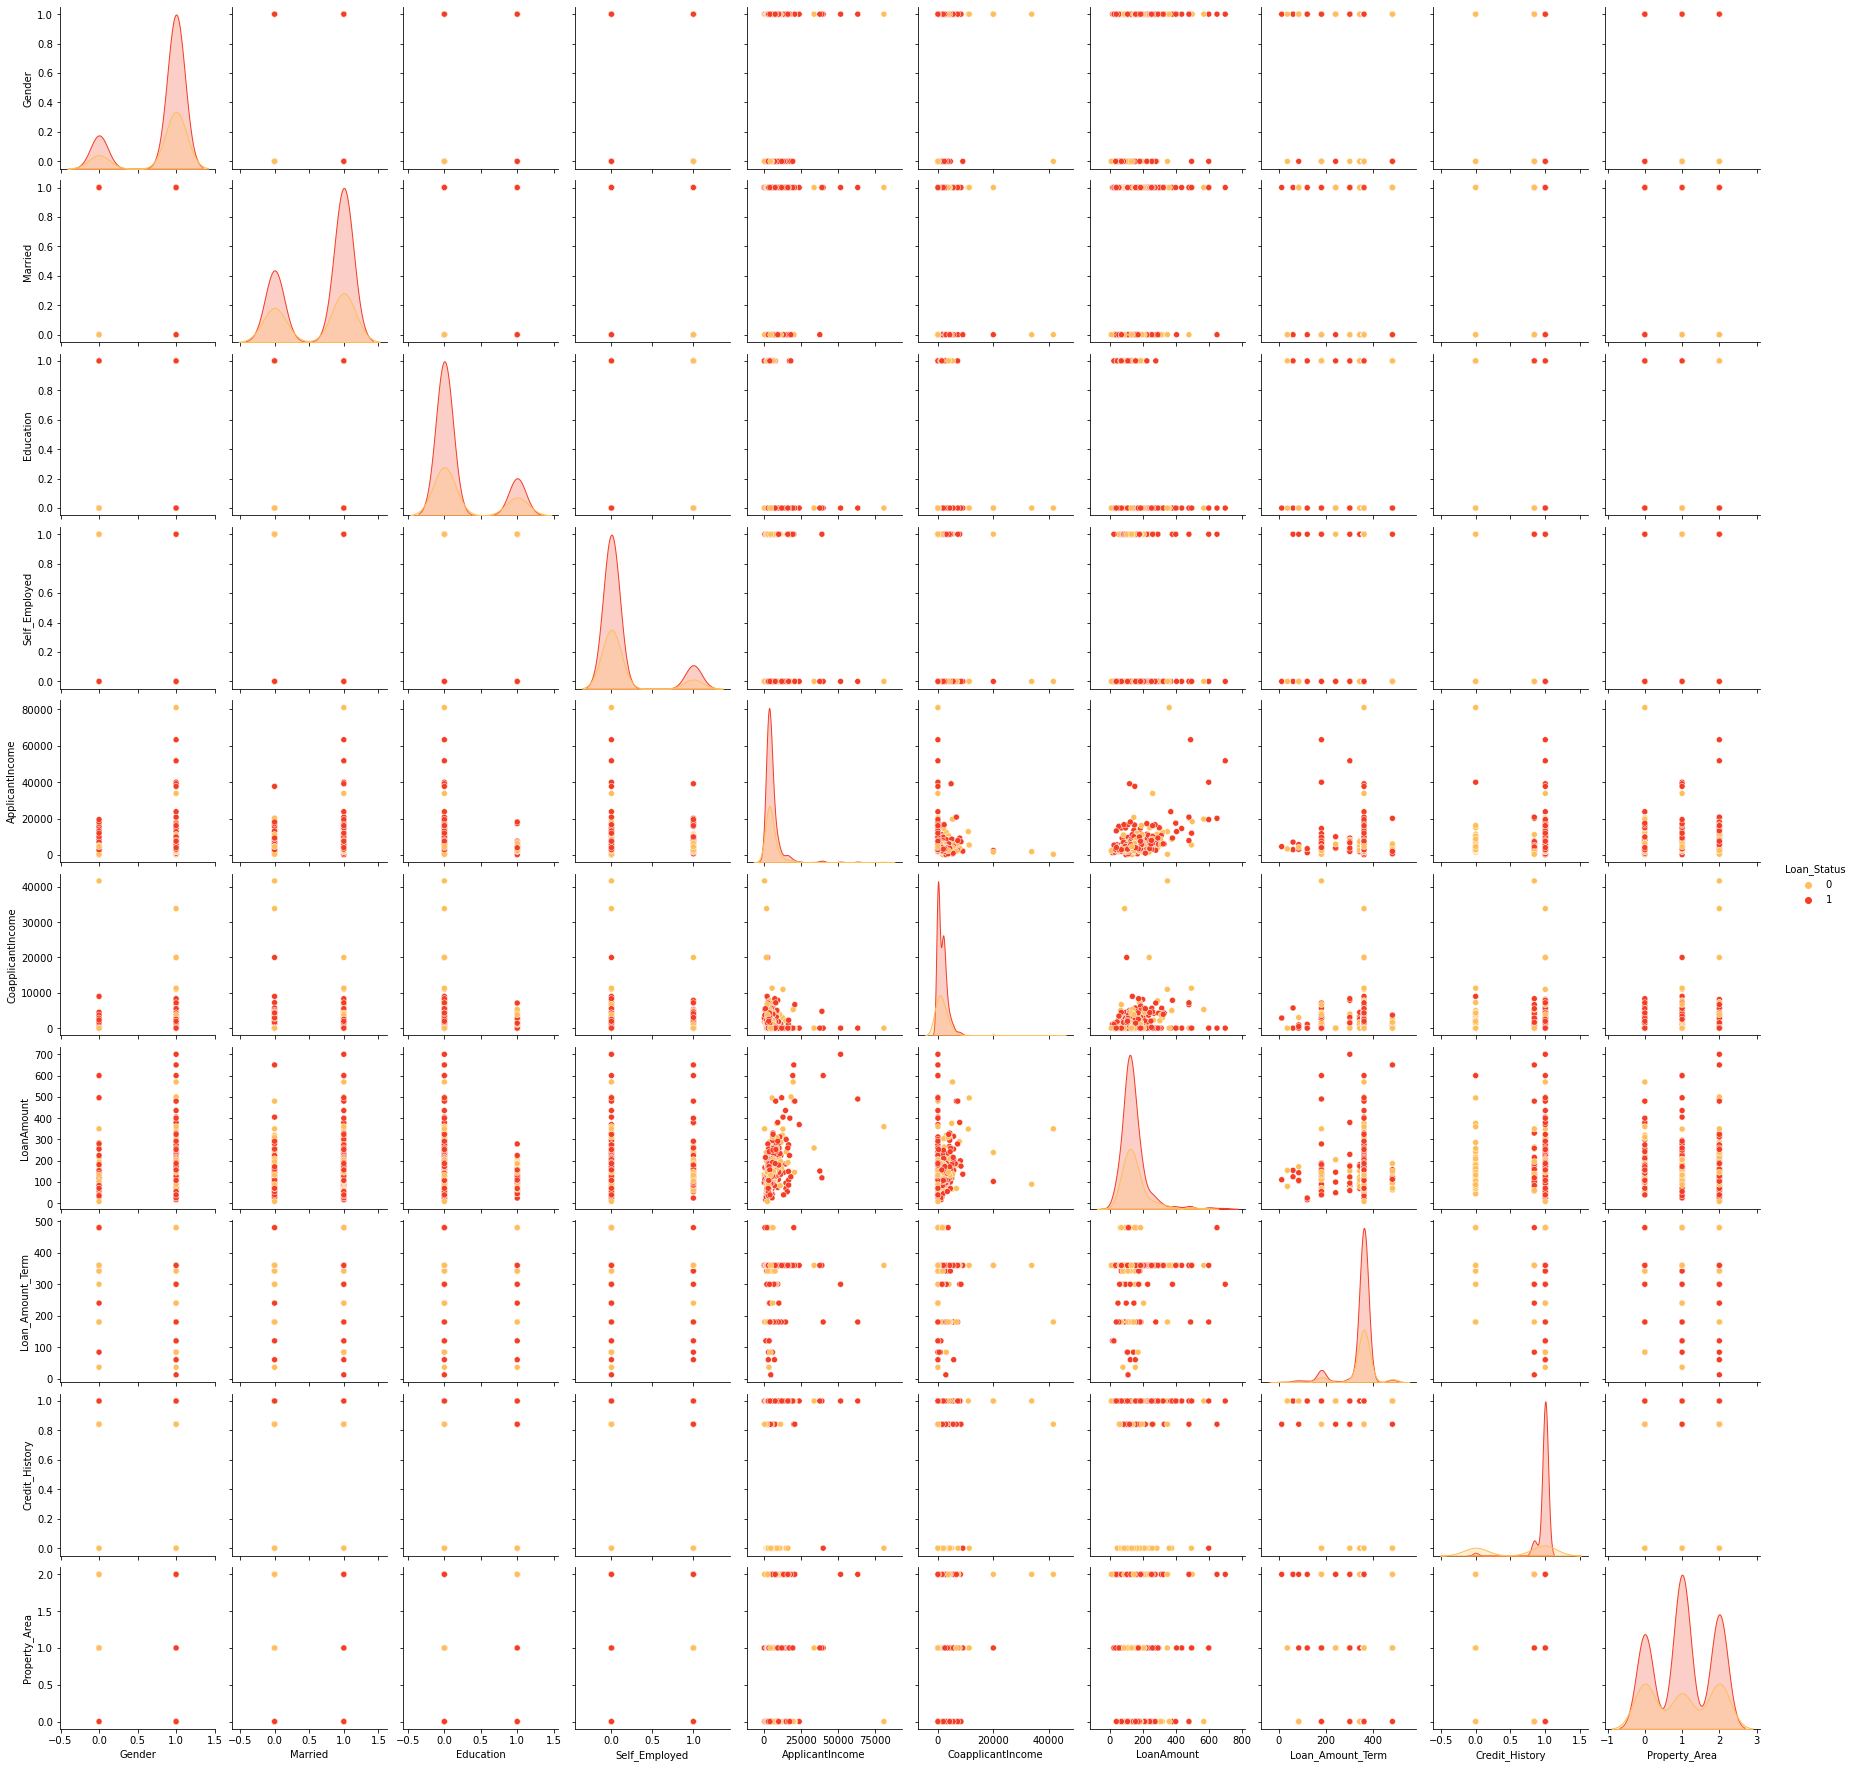

In [82]:
plt.figure(figsize=(25,20))
sns.pairplot(loan,hue='Loan_Status',palette='YlOrRd')
plt.show()

THIS PAIRPLOT GIVES US THE INSIGHT OF THE GRAPH AND RELATIONSHIP BETWEEN THE VARIOUS FATURES WITH OUR TARGET VARIABLE "Loan_Status"

# NOW WE DO SOME PREPROCESSING

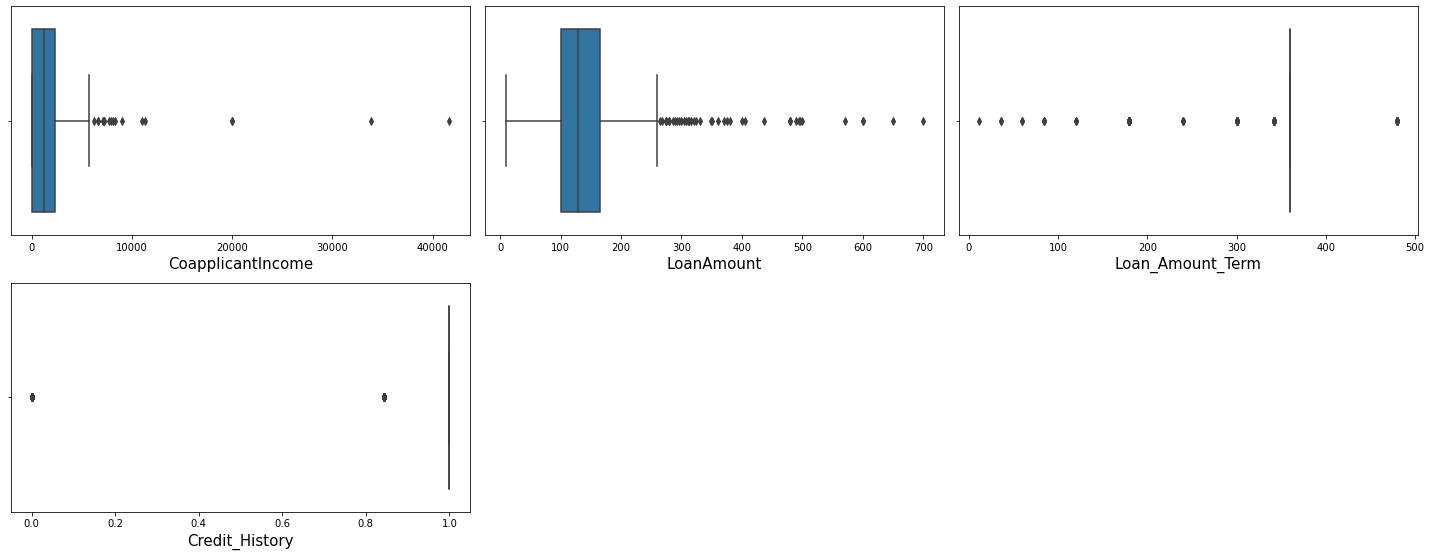

In [33]:
# LET'S FIND OUTLIERS IN THE DATASET SINCE WE HAVE SOME CATEGORICAL COLUMN SO WE HAVE TO SEPRATE IT FROM NUMERICAL COLUMN 
numerical_columns = loan.select_dtypes(include=['float64']).columns

plt.figure(figsize=(20, 15))
plot_number = 1
for feature in numerical_columns:
    if plot_number <= 20:
        plt.subplot(4, 3, plot_number)
        sns.boxplot(data=loan, x=feature)
        plt.xlabel(feature, fontsize=15)
    plot_number += 1
plt.tight_layout()
plt.show()

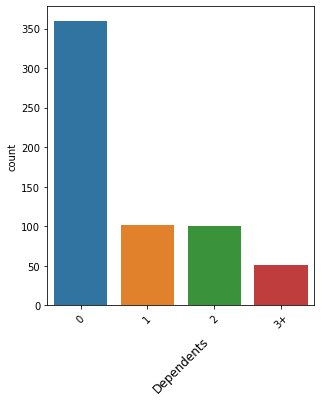

In [34]:
categorical_columns = loan.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 10))
plot_number = 1
for feature in categorical_columns:
    if plot_number <= 10:
        plt.subplot(2, 5, plot_number)
        sns.countplot(data=loan, x=feature)
        plt.xlabel(feature, fontsize=12, rotation=45)
        plt.xticks(rotation=45)
    plot_number += 1
plt.tight_layout()
plt.show()

AS WE CAN SEE THAT ONLY YEAR COLUMN HAVE NO OUTLIERS AND REST ONE CONTAIN OUTLIERS SO WE HAVE TO REMOVE THE OUTLIERS SO WILL USE Z- SCORE METHOD

# Z - SCORE

In [35]:
# LET'S USE Z- SCORE METHOD TO REMOVE THE OUTLIERS
feature_with_outliers= loan[["LoanAmount","CoapplicantIncome","Loan_Amount_Term"]]

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(feature_with_outliers))

In [37]:
z

,LoanAmount,CoapplicantIncome,Loan_Amount_Term
0,0.000000,0.554487,0.279851
1,0.219273,0.038732,0.279851
2,0.957641,0.554487,0.279851
3,0.314547,0.251980,0.279851
4,0.064454,0.554487,0.279851
...,...,...,...
609,0.898095,0.554487,0.279851
610,1.267279,0.554487,2.518655
611,1.269371,0.472404,0.279851
612,0.483367,0.554487,0.279851


as you can see that we use Z-SCore and reduce the dataset

In [38]:
# We have assumed the Z-score threshold < 3 will have no outliers 

loan_new=loan[(z<3).all(axis=1)]

In [39]:
loan_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


THIS NEW DATAFRAME WEW HAVE CREATED CONTAINS REMOVED OUTLIERS AS YOU CAN SEE THE NUMBER OF ROWS HAVE BEEN CHANGED FROM 612 TO 582 ALMOST MORE THAN 70 ROWS ARE REMOVED

# SKWENESS

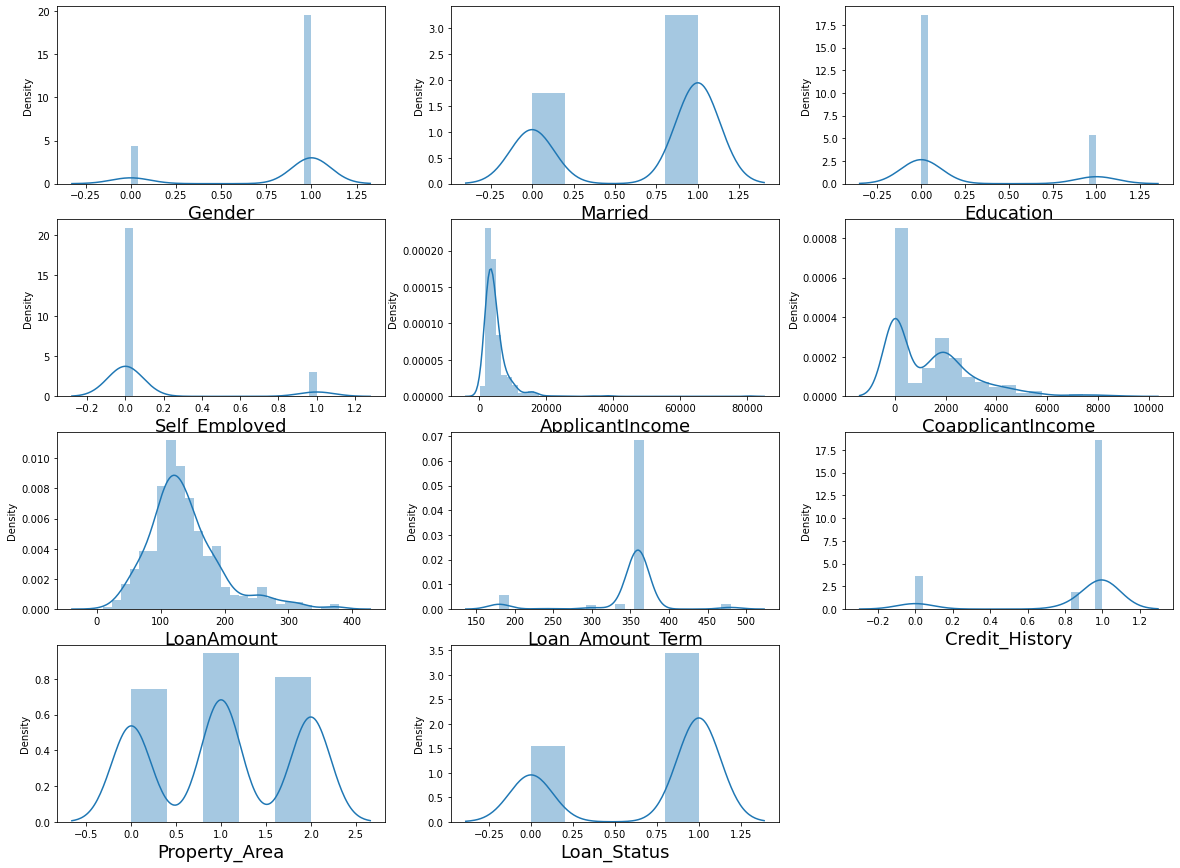

In [40]:
# LET'S CHECK THE SKWENESS OF OUR DATASET USING DISTPLOT
col=["Gender","Married","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Loan_Status"]
plt.figure(figsize=(20,15))
plotnumber=1
for column in col:
    if plotnumber<=13:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(loan_new[column])
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.show()

AS WE CAN SEE THAT BY LOOKING AT THE GRAPG OF SKWENESS WE CAN SAY GEPAH LOOK PERFECT BY VISULAIZATION BUT WE CAN'T SAY ANYTHING WE HAVE TO CHECK THAT SKWENESS NUMBER 

In [41]:
loan_new.skew()

Gender              -1.636555
Married             -0.636160
Education            1.319920
Self_Employed        2.244210
ApplicantIncome      8.062627
CoapplicantIncome    1.348959
LoanAmount           1.195901
Loan_Amount_Term    -2.090517
Credit_History      -1.917595
Property_Area       -0.048661
Loan_Status         -0.818715
dtype: float64

AS WE CAN SEE THAT THERE IS LITTLE SKWENESS PRESENT IN THE APLLICANTINCOME COLUMN THAT WE HAVE TO REMOVE THAT FROM OUR DATASET LET'S USE TRANSFORMATION TO REMOVE THAT FROM DATASET

In [42]:
loan_new["ApplicantIncome"]=np.sqrt(loan_new["ApplicantIncome"])

In [43]:
loan_new.skew()

Gender              -1.636555
Married             -0.636160
Education            1.319920
Self_Employed        2.244210
ApplicantIncome      2.945604
CoapplicantIncome    1.348959
LoanAmount           1.195901
Loan_Amount_Term    -2.090517
Credit_History      -1.917595
Property_Area       -0.048661
Loan_Status         -0.818715
dtype: float64

AS WE CAN SEE THAT WE HAVE REMOBED THE SKWENESS FROM THE DATASET FROM APPLICANTINCOME COLUMN NOW OUR DATSET IS CLEAN NOW WE WILL CHECK THE THE MULTICOLLINEARITY 


# HEAT MAP

In [44]:
corr=loan_new.corr()
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378603,0.043378,-0.005262,0.060108,0.188046,0.162988,-0.103304,0.016012,-0.028467,0.016514
Married,0.378603,1.000000,0.023242,-0.012867,0.004950,0.236382,0.171072,-0.126173,0.010914,0.007231,0.084641
Education,0.043378,0.023242,1.000000,-0.008106,-0.172396,-0.036186,-0.151137,-0.095599,-0.079864,-0.065776,-0.091183
Self_Employed,-0.005262,-0.012867,-0.008106,1.000000,0.203603,-0.027759,0.109252,-0.032672,-0.012012,-0.026400,-0.022131
ApplicantIncome,0.060108,0.004950,-0.172396,0.203603,1.000000,-0.206449,0.478076,-0.037204,0.011384,-0.039825,-0.024240
CoapplicantIncome,0.188046,0.236382,-0.036186,-0.027759,-0.206449,1.000000,0.281709,-0.060549,-0.015947,-0.088835,0.049251
LoanAmount,0.162988,0.171072,-0.151137,0.109252,0.478076,0.281709,1.000000,0.043150,-0.005056,-0.091046,-0.044745
Loan_Amount_Term,-0.103304,-0.126173,-0.095599,-0.032672,-0.037204,-0.060549,0.043150,1.000000,0.030030,-0.059922,-0.018446
Credit_History,0.016012,0.010914,-0.079864,-0.012012,0.011384,-0.015947,-0.005056,0.030030,1.000000,-0.005460,0.562425
Property_Area,-0.028467,0.007231,-0.065776,-0.026400,-0.039825,-0.088835,-0.091046,-0.059922,-0.005460,1.000000,0.028143


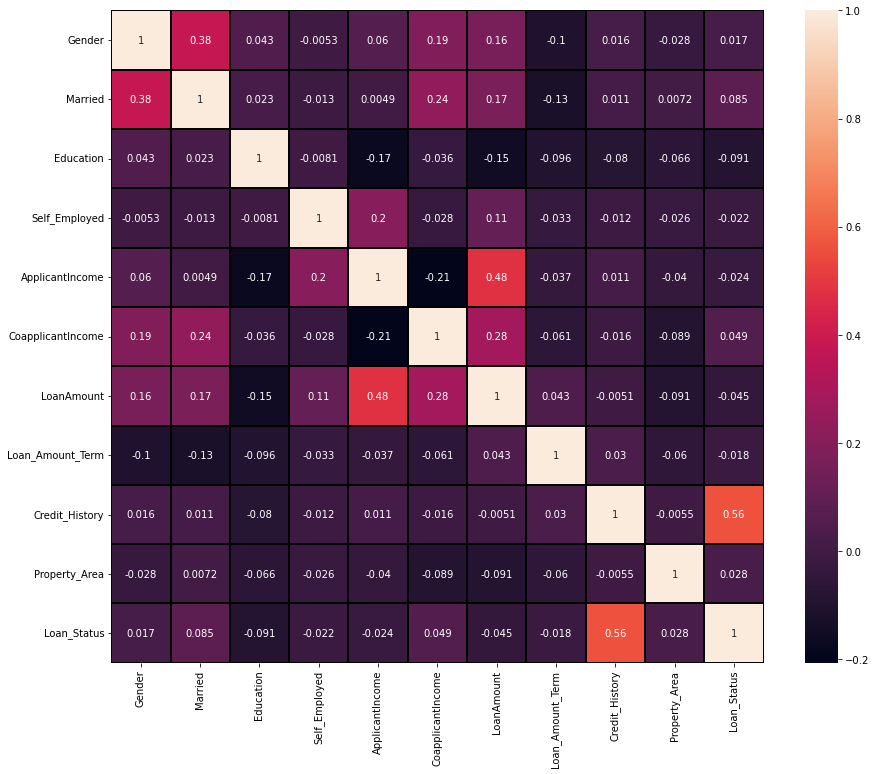

In [45]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot_kws={'size':10},square=True,annot=True,linecolor="black",linewidth=2)
plt.show()

AS WR CAN CLEALRY SEE THAT FROM HEATMAP THAT OUR TARGET VARIABLE LOAN_STATUS HAVE STRONG CORRELATION WITH FEATURE CREDIT_HISTORY AND VERY NEAGTIVE CORRELATION WITH FEATURE LOAN_AMOUNT WE HAVE TO CEHCK MULTICOLLINEARITY MORE SO WE CAN  BE SURE ABOUT OUR DATASET

In [46]:
corr["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.562425
Married              0.084641
CoapplicantIncome    0.049251
Property_Area        0.028143
Gender               0.016514
Loan_Amount_Term    -0.018446
Self_Employed       -0.022131
ApplicantIncome     -0.024240
LoanAmount          -0.044745
Education           -0.091183
Name: Loan_Status, dtype: float64

In [47]:
# let's visulaize this target variable with other features 
corr_target = corr['Loan_Status'].sort_values(ascending=False).drop('Loan_Status')
corr_df = pd.DataFrame(corr_target)
corr_df.reset_index(inplace=True)

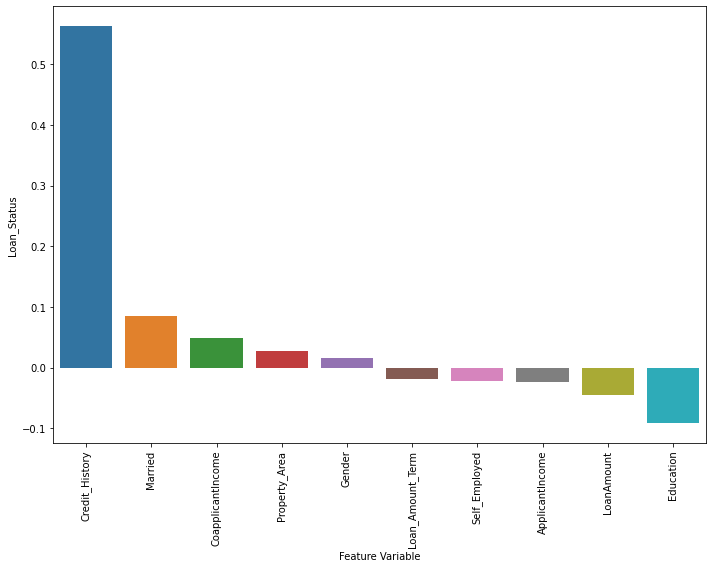

In [48]:
plt.figure(figsize=(10, 8))
sns.barplot(x='index', y='Loan_Status', data=corr_df)
plt.xlabel('Feature Variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

AS WE CAN THROUGH VISULAIZATION THAT FEATUER CREDIT_HISTORY HAVE STRONG COORELATION WITH OUR TARGET VARIBLE LOAN_STATUS

# NOW WE AV TO CHECK VIF VALUE FOR THAT WE HAVE TO STANDARIZED OUR DATASET

# STANDARIZATION

In [49]:
# LET'S SEPRATE THE TAGET AND FEATURE VARIABLE FROM THE DATASET 
x= loan_new.drop("Loan_Status",axis=1)
y=loan_new["Loan_Status"]

In [50]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,76.478755,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,67.697858,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,54.772256,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,50.823223,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,77.459667,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,53.851648,0.0,71.000000,360.0,1.0,0
610,1,1,3+,0,0,64.078077,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,89.844310,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,87.080423,0.0,187.000000,360.0,1.0,2


In [51]:
x.shape

(582, 11)

In [52]:
y.shape

(582,)

In [53]:
x['Dependents'] = x['Dependents'].replace('3+', 3)

In [54]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,76.478755,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,67.697858,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,54.772256,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,50.823223,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,77.459667,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,53.851648,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,64.078077,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,89.844310,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,87.080423,0.0,187.000000,360.0,1.0,2


# Let's use standard scaler to standarized the data

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [56]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.474619,-1.366380,-0.727078,-0.538949,-0.381666,0.419114,-0.857090,0.162229,0.238319,0.456827,1.233857
1,0.474619,0.731861,0.273299,-0.538949,-0.381666,0.037724,0.055195,-0.156759,0.238319,0.456827,-1.303615
2,0.474619,0.731861,-0.727078,-0.538949,2.620089,-0.523688,-0.857090,-1.230901,0.238319,0.456827,1.233857
3,0.474619,0.731861,-0.727078,1.855464,-0.381666,-0.695210,0.569414,-0.295358,0.238319,0.456827,1.233857
4,0.474619,-1.366380,-0.727078,-0.538949,-0.381666,0.461719,-0.857090,0.068464,0.238319,0.456827,1.233857
...,...,...,...,...,...,...,...,...,...,...,...
577,-2.106953,-1.366380,-0.727078,-0.538949,-0.381666,-0.563673,-0.857090,-1.144277,0.238319,0.456827,-1.303615
578,0.474619,0.731861,2.274052,-0.538949,-0.381666,-0.119498,-0.857090,-1.681347,-3.252490,0.456827,-1.303615
579,0.474619,0.731861,0.273299,-0.538949,-0.381666,0.999635,-0.711898,2.008849,0.238319,0.456827,1.233857
580,0.474619,0.731861,1.273675,-0.538949,-0.381666,0.879588,-0.857090,0.865408,0.238319,0.456827,1.233857


AS YOU CAN SEE WE HAVE STANDARIZED OUR MODEL GIVE EQUAL IMMPORTANCE TO EVERY ELEMENT NOW WE CAN CHECK MULTICOLLNEARITY AND BUILD OOR MODEL

# let's check multicollinearity using VIF

In [57]:
#  LET'S CHECK THE MULTICOLLINEARITY VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["VIF_value"]=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif_data["feature"]=x.columns

In [58]:
vif_data

,VIF_value,feature
0,1.208061,Gender
1,1.343471,Married
2,1.185681,Dependents
3,1.077886,Education
4,1.046641,Self_Employed
5,1.648111,ApplicantIncome
6,1.409695,CoapplicantIncome
7,1.686194,LoanAmount
8,1.057224,Loan_Amount_Term
9,1.009363,Credit_History


AS WE CAN SEE THAT ALL VALUES OF THE FEATURE HAVE IN RANGE VALUES FROM -5 TO +5 SO OUR DATSET DON;T HAVE ANY  MULTICOLLINEARITY NOW WE CAN BUILD OUR FINAL MODEL 

# Also in the visulaizatyion we see that target variable is unbalanced we have to balanced since it is classification problem we will use: - random ov ersampling , under sampling

In [59]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [61]:
y.value_counts()

1    401
0    401
Name: Loan_Status, dtype: int64

NOW OUR DATASET FOR TARGET VARIABLE IS BALANCED 

# NOW WE BUILD OUR MACHINE LEARNING MODEL

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Random Forest classifier

In [63]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        RFR = RandomForestClassifier()
        
        RFR.fit(X_train, y_train)
        y_pred = RFR.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 88
 best_accuracy_score:-  91.30434782608695


In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)
RFR=RandomForestClassifier()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of random forest classifier is ")
print(conf)
print("classification_report of random forest classifier at random state is:- ")
print(clas)

confusion matrix of random forest classifier is 
[[69 12]
 [ 4 76]]
classification_report of random forest classifier at random state is:- 
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        81
           1       0.86      0.95      0.90        80

    accuracy                           0.90       161
   macro avg       0.90      0.90      0.90       161
weighted avg       0.90      0.90      0.90       161



# Logistic regression

In [65]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        logistic_r= LogisticRegression()
        
        logistic_r.fit(X_train, y_train)
        y_pred = logistic_r.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 132
 best_accuracy_score:-  82.6086956521739


In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=132)
logistic_r= LogisticRegression()
logistic_r.fit(X_train, y_train)
y_pred = logistic_r.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of logistic regression is ")
print(conf)
print("classification_report of logistic regression is:- ")
print(clas)

confusion matrix of logistic regression is 
[[45 24]
 [ 4 88]]
classification_report of logistic regression is:- 
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        69
           1       0.79      0.96      0.86        92

    accuracy                           0.83       161
   macro avg       0.85      0.80      0.81       161
weighted avg       0.84      0.83      0.82       161



# Support vector classifier

In [67]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        svc= SVC()
        
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 29
 best_accuracy_score:-  81.98757763975155


In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29)
svc= SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of logistic regression is ")
print(conf)
print("classification_report of logistic regression is:- ")
print(clas)

confusion matrix of logistic regression is 
[[54 24]
 [ 5 78]]
classification_report of logistic regression is:- 
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        78
           1       0.76      0.94      0.84        83

    accuracy                           0.82       161
   macro avg       0.84      0.82      0.82       161
weighted avg       0.84      0.82      0.82       161



# # KNeighbours Classifier

In [69]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        knc=KNeighborsClassifier()
        
        knc.fit(X_train, y_train)
        y_pred = knc.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 118
 best_accuracy_score:-  85.09316770186336


In [70]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=118)
knc=KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is KNeighborsClassifier")
print(conf)
print("classification_report of KNeighborsClassifier is:- ")
print(clas)

confusion matrix of  is KNeighborsClassifier
[[66 13]
 [11 71]]
classification_report of KNeighborsClassifier is:- 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        79
           1       0.85      0.87      0.86        82

    accuracy                           0.85       161
   macro avg       0.85      0.85      0.85       161
weighted avg       0.85      0.85      0.85       161



# AdaBoostClassifier

In [71]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        adb=AdaBoostClassifier()
        
        adb.fit(X_train, y_train)
        y_pred = adb.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 82
 best_accuracy_score:-  84.472049689441


In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=82)
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is AdaBoostClassifier")
print(conf)
print("classification_report of AdaBoostClassifier is:- ")
print(clas)

confusion matrix of  is AdaBoostClassifier
[[61 21]
 [ 4 75]]
classification_report of AdaBoostClassifier is:- 
              precision    recall  f1-score   support

           0       0.94      0.74      0.83        82
           1       0.78      0.95      0.86        79

    accuracy                           0.84       161
   macro avg       0.86      0.85      0.84       161
weighted avg       0.86      0.84      0.84       161



# DescionTree Classifier

In [73]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        dtc=DecisionTreeClassifier()
        
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 153
 best_accuracy_score:-  87.5776397515528


In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=153)
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is DecisionTreeClassifier")
print(conf)
print("classification_report of DecisionTreeClassifier is:- ")
print(clas)

confusion matrix of  is DecisionTreeClassifier
[[73  8]
 [14 66]]
classification_report of DecisionTreeClassifier is:- 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        81
           1       0.89      0.82      0.86        80

    accuracy                           0.86       161
   macro avg       0.87      0.86      0.86       161
weighted avg       0.87      0.86      0.86       161



# GradientBoostingClassifier

In [76]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
        GBC=GradientBoostingClassifier()
        
        GBC.fit(X_train, y_train)
        y_pred = GBC.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 29
 best_accuracy_score:-  85.06224066390041


In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29)
GBC=GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is DecisionTreeClassifier")
print(conf)
print("classification_report of DecisionTreeClassifier is:- ")
print(clas)

confusion matrix of  is DecisionTreeClassifier
[[61 17]
 [ 5 78]]
classification_report of DecisionTreeClassifier is:- 
              precision    recall  f1-score   support

           0       0.92      0.78      0.85        78
           1       0.82      0.94      0.88        83

    accuracy                           0.86       161
   macro avg       0.87      0.86      0.86       161
weighted avg       0.87      0.86      0.86       161



# BaggingClassifier

In [78]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        BC=BaggingClassifier()
        
        BC.fit(X_train, y_train)
        y_pred = BC.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 147
 best_accuracy_score:-  87.5776397515528


In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=147)
BC=GradientBoostingClassifier()
BC.fit(X_train, y_train)
y_pred = BC.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is DecisionTreeClassifier")
print(conf)
print("classification_report of DecisionTreeClassifier is:- ")
print(clas)

confusion matrix of  is DecisionTreeClassifier
[[56 24]
 [ 6 75]]
classification_report of DecisionTreeClassifier is:- 
              precision    recall  f1-score   support

           0       0.90      0.70      0.79        80
           1       0.76      0.93      0.83        81

    accuracy                           0.81       161
   macro avg       0.83      0.81      0.81       161
weighted avg       0.83      0.81      0.81       161



# As we can see after aplying different model we find "Random Forest Classifier" have best accuracy but still here we not finished we still don"t know that wether our data is overrfitting our score maybe thats why it giving that accuracy so to check we do croos validation

In [80]:
score=cross_val_score(RFR,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

83.55512422360249
[0.77639752 0.7826087  0.8625     0.85625    0.9       ]
0.04022515527950299


In [81]:
score=cross_val_score(logistic_r,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

70.57220496894409
[0.70186335 0.72049689 0.725      0.69375    0.6875    ]
0.17005434782608697


In [82]:
score=cross_val_score(dtc,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

75.57686335403727
[0.67080745 0.71428571 0.81875    0.7875     0.7875    ]
0.12000776397515522


In [83]:
score=cross_val_score(adb,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

74.57763975155281
[0.66459627 0.71428571 0.7625     0.80625    0.78125   ]
0.1299999999999999


In [84]:
score=cross_val_score(GBC,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

79.07686335403726
[0.66459627 0.72049689 0.84375    0.83125    0.89375   ]
0.0850077639751553


In [85]:
score=cross_val_score(svc,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

74.31754658385093
[0.70807453 0.7515528  0.78125    0.71875    0.75625   ]
0.1326009316770187


In [86]:
score=cross_val_score(knc,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

75.44487577639751
[0.73913043 0.70186335 0.76875    0.80625    0.75625   ]
0.12132763975155281


# AS WE CAN SEE THE LESS DIFERRENCE WHICH COMES OUT IS 0.04 WHICH IS GRADIENT BOOSTING CALSSIFIER MODEL IT MEANS OUR LOGITIC REGRESSION GIVES GOOD RESULT NOW WE DO HYPERPARAMETER TUNNING TO INCRESES ACCURACY

# Hyperparameter Tunning

In [109]:
# now we do hyperparametertunning
from sklearn.model_selection import GridSearchCV 
params={'n_estimators': [100,150,200],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [3,4,5],
    'subsample': [0.8,0.9,1],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3],
    'max_features': ['sqrt'],
    'loss': ['deviance','exponential']
       }

In [110]:
GSCV=GridSearchCV(estimator=GBC, param_grid=params, cv=5)

In [111]:
GSCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 4, 5], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 0.9, 1]})

In [112]:
GSCV.best_params_

{'learning_rate': 0.3,
 'loss': 'exponential',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100,
 'subsample': 0.9}

# now we get our final best_parameters now we use to build our final model

In [113]:
best_model_loan=GradientBoostingClassifier(learning_rate=0.3 ,loss= 'exponential',max_features='sqrt',min_samples_leaf= 2,min_samples_split=4,n_estimators=100,subsample= 0.9)
best_model_loan.fit(X_train,y_train)
pred=best_model_loan.predict(X_test)
ac=accuracy_score(y_test,pred)
accurate=(ac*100)
print("accuracy of our final model is :- ")
print(accurate)

accuracy of our final model is :- 
80.12422360248446


# As you can see our final model accuracy is :- 80.12%

In [114]:
conf_final_model_loan=confusion_matrix(y_test,pred)
print("confusion matrix of our final model loan is")
print(conf_final_model_loan)
clas_final_model_loan=classification_report(y_test,pred)
print("Classsification report of our final model loan is ")
print(clas_final_model_loan)

confusion matrix of our final model loan is
[[61 19]
 [13 68]]
Classsification report of our final model loan is 
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        80
           1       0.78      0.84      0.81        81

    accuracy                           0.80       161
   macro avg       0.80      0.80      0.80       161
weighted avg       0.80      0.80      0.80       161



In [116]:
import pickle
project_name="loan_prediction.pkl"
pickle.dump(best_model_loan,open(project_name,'wb'))

In [118]:
import pickle
load_final_model=pickle.load(open('loan_prediction.pkl','rb'))
final_result=load_final_model.score(X_test,y_test)
print(final_result*100)

80.12422360248446


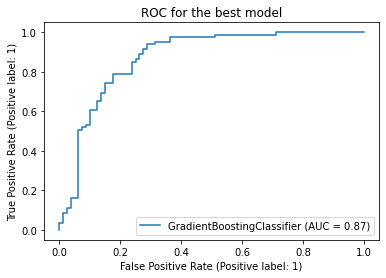

In [122]:
from sklearn.metrics import plot_roc_curve 
plot_roc_curve(best_model_loan, X_test, y_test)
plt.title("ROC for the best model")
plt.show()

AS WE CAN SEE AUC =0.87 IS VERY GOOD SCORE AS MY MODEL ABLE TO PREDICT OR DISTINGUISG BETWEEN THETARGET VARABLE VERY WELL 

In [119]:
target_variable_prediction=pd.DataFrame([load_final_model.predict(X_test)[:],y_test[:]],index=["predicted","original"])

In [120]:
target_variable_prediction

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
predicted,1,0,0,0,1,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,1
original,0,0,0,0,1,0,1,0,1,1,...,0,1,1,0,1,0,0,0,0,0


As you can clealry see that from target_variable_prediction chart that whatever we predicted and the originally data was matching correctly almost 80% correctly so this model is very good

# Our final model is build and score is 80% correct and almost it predict close to original datset